Regresion
https://drive.google.com/file/d/1PDYKuc0Ly7iBjG81voDPiVHmDY0o0Zmw/view?usp=sharing


El dataset de startups contiene variables como gastos en
investigación y desarrollo (I+D), costos administrativos, gastos en
marketing, ubicación geográfica y beneficios netos.
Este tipo de datos es esencial para entender el rendimiento
financiero y operativo de una startup, lo cual es crítico para la
toma de decisiones tanto para los inversionistas como para la
administración de la empresa.

a. Análisis Exploratorio de Datos (EDA) ¿Qué conclusiones
puede sacar con respecto a las distribuciones de las
variables numéricas y las relaciones entre ellas?

In [112]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler


In [113]:
df = pd.read_csv("emprendimientos.csv")

In [114]:
emprendimientos = df.copy()

In [115]:
emprendimientos

,Unnamed: 0,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,0,165349.200000,136897.800000,471784.100000,New York,192261.830000,Energy,227095.722346,289,Series A,608681.900000
1,1,162597.700000,151377.590000,443898.530000,California,191792.060000,Tech,224711.757208,217,Series B,595276.120000
2,2,153441.510000,101145.550000,407934.540000,Florida,191050.390000,Finance,222717.429984,407,Series C,509080.090000
3,3,144372.410000,118671.850000,383199.620000,New York,182901.990000,Finance,214017.365199,383,Series A,501871.470000
4,4,142107.340000,91391.770000,366168.420000,Florida,166187.940000,Finance,196476.965990,351,Series B,457560.190000
...,...,...,...,...,...,...,...,...,...,...,...
65,65,134093.502036,47327.344651,26681.272559,California,105423.930052,Tech,120378.804381,335,Seed,74008.617209
66,66,83460.960473,102975.139152,287058.802746,New York,-21313.506762,Healthcare,-14885.847169,430,Seed,390033.941898
67,67,111737.965689,125193.850785,73364.287453,New York,187372.314677,Finance,197551.192890,367,Seed,198558.138238
68,68,28077.387719,2743.241602,294652.768452,New York,62478.033370,Healthcare,64877.719983,258,Seed,297396.010053


In [116]:
emprendimientos = emprendimientos.drop(columns=['Unnamed: 0'])


In [117]:
from funciones_importantes import validate_columns

In [118]:
validate_columns(emprendimientos)

,Column,Unique_Values,Num_Unique_Values,Num_Null_Values,Sample_Unique_Values,%_null
0,RnD_Expenditure,"[165349.2, 162597.7, 153441.51, 144372.41, 142...",69,0,"[28663.76, 83460.9604734254, 0.0, 78013.11, 12...",0.0
1,Admin_Costs,"[136897.8, 151377.59, 101145.55, 118671.85, 91...",70,0,"[125193.85078460594, 154806.14, 85047.44, 9139...",0.0
2,Marketing_Expenditure,"[471784.1, 443898.53, 407934.54, 383199.62, 36...",68,0,"[73364.28745290508, 148001.11, 303319.26, 1340...",0.0
3,Location,"[New York, California, Florida]",3,0,"[California, New York, California]",0.0
4,Net_Profit,"[192261.83, 191792.06, 191050.39, 182901.99, 1...",70,0,"[-8661.450720766807, 89949.14, 131499.49633761...",0.0
5,Industry_Sector,"[Energy, Tech, Finance, Healthcare, Retail]",5,0,"[Retail, Retail, Retail, Finance, Retail]",0.0
6,Profit,"[227095.7223459677, 224711.75720836723, 222717...",70,0,"[119242.64614997416, 139206.70426069826, 56804...",0.0
7,Employee_Count,"[289, 217, 407, 383, 351, 58, 315, 79, 179, 17...",68,0,"[31, 194, 453, 440, 144]",0.0
8,Investment_Round,"[Series A, Series B, Series C, IPO, Seed]",5,0,"[Series B, Series C, Seed, Seed, Seed]",0.0
9,Operational_Cost,"[608681.8999999999, 595276.12, 509080.09, 5018...",70,0,"[277515.78, 409095.36, 457560.19, 291341.72000...",0.0


No hay valores nulos, por los cual sigo con el análisis

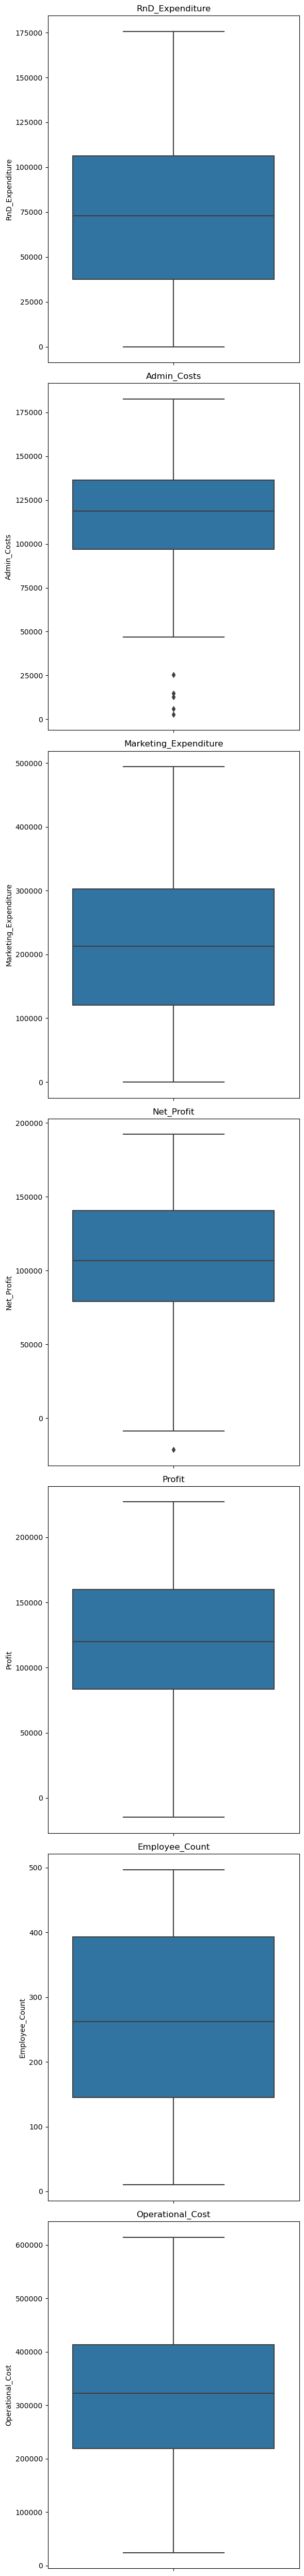

In [119]:
from funciones_importantes import grafico_out_boxplot
grafico_out_boxplot(emprendimientos)

In [122]:
from funciones_importantes import plot_histograms

plot_histograms(emprendimientos)


ImportError: cannot import name 'plot_histograms' from 'funciones_importantes' (c:\Users\chiar\OneDrive\Documentos\GitHub\Regresion\funciones_importantes.py)

<Axes: xlabel='Employee_Count', ylabel='Count'>

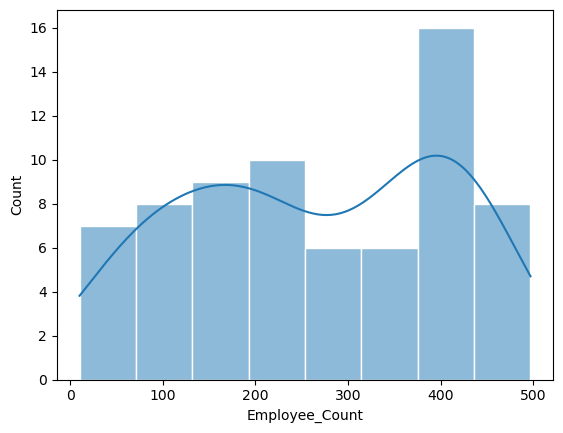

In [ ]:
sns.histplot(emprendimientos['Employee_Count'], kde=True, edgecolor='w')

In [ ]:
emprendimientos.describe()

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Net_Profit,Profit,Employee_Count,Operational_Cost
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,73645.768116,110300.346605,212932.971333,108074.578648,120746.497961,264.500000,323233.317938
std,46643.653676,39611.402919,129284.203274,49144.596277,55478.853960,141.087983,135322.611919
min,0.000000,2743.241602,0.000000,-21313.506762,-14885.847169,10.000000,24435.504010
25%,37578.659207,96962.557500,120540.355000,78931.372500,83428.580072,144.750000,219525.129324
50%,73051.080000,118608.950000,212716.240000,106661.195882,119810.725266,262.000000,322937.665000
75%,106300.780101,136547.117500,302423.767500,140623.042127,160098.271102,393.000000,413510.677500
max,175623.487278,182645.560000,494430.544453,192261.830000,227095.722346,497.000000,614542.229755


In [ ]:
emprendimientos[emprendimientos['Admin_Costs']<50000]


,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
52,22.874963,47013.626724,140221.996032,California,181877.145099,Tech,180909.147951,222,Seed,187235.622756
56,37252.042276,12756.631705,454297.751547,California,170826.522801,Tech,172668.226306,215,Seed,467054.383252
57,69112.145409,5858.217485,146807.074187,California,105918.051764,Healthcare,114437.223424,194,Seed,152665.291672
58,79353.494846,25474.562935,143887.669293,Florida,137735.608507,Retail,146816.260414,453,Seed,169362.232228
60,83838.902881,14752.025075,9683.478935,California,17481.972941,Energy,26885.266798,34,Seed,24435.504010
65,134093.502036,47327.344651,26681.272559,California,105423.930052,Tech,120378.804381,335,Seed,74008.617209
68,28077.387719,2743.241602,294652.768452,New York,62478.033370,Healthcare,64877.719983,258,Seed,297396.010053


In [ ]:
emprendimientos[emprendimientos['Admin_Costs']>150000]


,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
1,162597.70,151377.59,443898.53,California,191792.06,Tech,224711.757208,217,Series B,595276.12
14,119943.24,156547.42,256512.92,Florida,132602.65,Tech,157035.161233,266,Seed,413060.34
19,86419.70,153514.11,0.00,New York,122776.86,Energy,139206.704261,314,Seed,153514.11
21,78389.47,153773.43,299737.29,New York,111313.02,Tech,127644.532595,397,Seed,453510.72
28,66051.52,182645.56,118148.20,Florida,103282.38,Finance,118025.463214,211,Seed,300793.76
29,65605.48,153032.06,107138.38,New York,101004.64,Finance,115595.094770,393,Seed,260170.44
31,61136.38,152701.92,88218.23,New York,97483.56,Tech,110088.998520,404,Seed,240920.15
34,46426.07,157693.92,210797.67,California,96712.80,Healthcare,105650.101851,452,Seed,368491.59
44,22177.74,154806.14,28334.72,California,65200.33,Tech,69126.225818,133,Series C,183140.86


In [ ]:
emprendimientos[emprendimientos['Admin_Costs']<50000]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
52,22.874963,47013.626724,140221.996032,California,181877.145099,Tech,180909.147951,222,Seed,187235.622756
56,37252.042276,12756.631705,454297.751547,California,170826.522801,Tech,172668.226306,215,Seed,467054.383252
57,69112.145409,5858.217485,146807.074187,California,105918.051764,Healthcare,114437.223424,194,Seed,152665.291672
58,79353.494846,25474.562935,143887.669293,Florida,137735.608507,Retail,146816.260414,453,Seed,169362.232228
60,83838.902881,14752.025075,9683.478935,California,17481.972941,Energy,26885.266798,34,Seed,24435.504010
65,134093.502036,47327.344651,26681.272559,California,105423.930052,Tech,120378.804381,335,Seed,74008.617209
68,28077.387719,2743.241602,294652.768452,New York,62478.033370,Healthcare,64877.719983,258,Seed,297396.010053


In [ ]:
emprendimientos[emprendimientos['Marketing_Expenditure']<100000]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
19,86419.700000,153514.110000,0.000000,New York,122776.860000,Energy,139206.704261,314,Seed,153514.110000
30,61994.480000,115641.280000,91131.240000,Florida,99937.590000,Finance,112491.433426,10,Series C,206772.520000
31,61136.380000,152701.920000,88218.230000,New York,97483.560000,Tech,110088.998520,404,Seed,240920.150000
32,63408.860000,129219.610000,46085.250000,California,97427.840000,Healthcare,109221.826252,380,Series B,175304.860000
43,15505.730000,127382.300000,35534.170000,New York,69758.980000,Tech,74810.901395,232,Series A,162916.470000
44,22177.740000,154806.140000,28334.720000,California,65200.330000,Tech,69126.225818,133,Series C,183140.860000
45,1000.230000,124153.040000,1903.930000,New York,64926.080000,Energy,64688.051698,461,Seed,126056.970000
47,0.000000,135426.920000,0.000000,California,42559.730000,Energy,43337.220356,440,Seed,135426.920000
48,542.050000,51743.150000,0.000000,New York,35673.410000,Healthcare,34167.922152,237,Series A,51743.150000
49,0.000000,116983.800000,45173.060000,California,14681.400000,Energy,14468.659720,158,Seed,162156.860000


In [ ]:
emprendimientos[emprendimientos['Marketing_Expenditure']>300000]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,165349.200000,136897.800000,471784.100000,New York,192261.830000,Energy,227095.722346,289,Series A,608681.900000
1,162597.700000,151377.590000,443898.530000,California,191792.060000,Tech,224711.757208,217,Series B,595276.120000
2,153441.510000,101145.550000,407934.540000,Florida,191050.390000,Finance,222717.429984,407,Series C,509080.090000
3,144372.410000,118671.850000,383199.620000,New York,182901.990000,Finance,214017.365199,383,Series A,501871.470000
4,142107.340000,91391.770000,366168.420000,Florida,166187.940000,Finance,196476.965990,351,Series B,457560.190000
5,131876.900000,99814.710000,362861.360000,New York,156991.120000,Healthcare,182389.222120,58,Series A,462676.070000
7,130298.130000,145530.060000,323876.680000,Florida,155752.600000,Retail,181660.868792,79,Series B,469406.740000
8,120542.520000,148718.950000,311613.290000,New York,152211.770000,Energy,176217.055148,179,Series C,460332.240000
9,123334.880000,108679.170000,304981.620000,California,149759.960000,Tech,174837.534502,173,Seed,413660.790000
22,73994.560000,122782.750000,303319.260000,Florida,110352.250000,Finance,126015.598199,108,Seed,426102.010000


In [ ]:
emprendimientos[emprendimientos['Net_Profit']<50000]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
46,1315.460000,115816.210000,297114.460000,Florida,49490.750000,Tech,48501.046640,92,Seed,412930.670000
47,0.000000,135426.920000,0.000000,California,42559.730000,Energy,43337.220356,440,Seed,135426.920000
48,542.050000,51743.150000,0.000000,New York,35673.410000,Healthcare,34167.922152,237,Series A,51743.150000
49,0.000000,116983.800000,45173.060000,California,14681.400000,Energy,14468.659720,158,Seed,162156.860000
50,83404.400941,120111.685301,494430.544453,New York,49419.209246,Retail,56804.550646,408,Seed,614542.229755
51,144064.898688,145239.236358,374082.827190,California,-8661.450721,Retail,5768.589320,151,Seed,519322.063548
53,60466.514526,103848.392350,394639.664226,California,36941.464936,Healthcare,42223.865461,126,Seed,498488.056576
59,107763.346801,131721.375514,65014.286059,New York,37224.585494,Healthcare,47517.335865,409,Seed,196735.661574
60,83838.902881,14752.025075,9683.478935,California,17481.972941,Energy,26885.266798,34,Seed,24435.504010
66,83460.960473,102975.139152,287058.802746,New York,-21313.506762,Healthcare,-14885.847169,430,Seed,390033.941898


In [ ]:
emprendimientos[emprendimientos['Net_Profit']>150000]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,165349.200000,136897.800000,471784.100000,New York,192261.830000,Energy,227095.722346,289,Series A,608681.900000
1,162597.700000,151377.590000,443898.530000,California,191792.060000,Tech,224711.757208,217,Series B,595276.120000
2,153441.510000,101145.550000,407934.540000,Florida,191050.390000,Finance,222717.429984,407,Series C,509080.090000
3,144372.410000,118671.850000,383199.620000,New York,182901.990000,Finance,214017.365199,383,Series A,501871.470000
4,142107.340000,91391.770000,366168.420000,Florida,166187.940000,Finance,196476.965990,351,Series B,457560.190000
5,131876.900000,99814.710000,362861.360000,New York,156991.120000,Healthcare,182389.222120,58,Series A,462676.070000
6,134615.460000,147198.870000,127716.820000,California,156122.510000,Finance,183995.690418,315,IPO,274915.690000
7,130298.130000,145530.060000,323876.680000,Florida,155752.600000,Retail,181660.868792,79,Series B,469406.740000
8,120542.520000,148718.950000,311613.290000,New York,152211.770000,Energy,176217.055148,179,Series C,460332.240000
52,22.874963,47013.626724,140221.996032,California,181877.145099,Tech,180909.147951,222,Seed,187235.622756


In [ ]:
emprendimientos[emprendimientos['Profit']<50000]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
46,1315.460000,115816.210000,297114.460000,Florida,49490.750000,Tech,48501.046640,92,Seed,412930.670000
47,0.000000,135426.920000,0.000000,California,42559.730000,Energy,43337.220356,440,Seed,135426.920000
48,542.050000,51743.150000,0.000000,New York,35673.410000,Healthcare,34167.922152,237,Series A,51743.150000
49,0.000000,116983.800000,45173.060000,California,14681.400000,Energy,14468.659720,158,Seed,162156.860000
51,144064.898688,145239.236358,374082.827190,California,-8661.450721,Retail,5768.589320,151,Seed,519322.063548
53,60466.514526,103848.392350,394639.664226,California,36941.464936,Healthcare,42223.865461,126,Seed,498488.056576
59,107763.346801,131721.375514,65014.286059,New York,37224.585494,Healthcare,47517.335865,409,Seed,196735.661574
60,83838.902881,14752.025075,9683.478935,California,17481.972941,Energy,26885.266798,34,Seed,24435.504010
66,83460.960473,102975.139152,287058.802746,New York,-21313.506762,Healthcare,-14885.847169,430,Seed,390033.941898


In [ ]:
emprendimientos[emprendimientos['Profit']>160000]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,165349.200000,136897.800000,471784.100000,New York,192261.830000,Energy,227095.722346,289,Series A,608681.900000
1,162597.700000,151377.590000,443898.530000,California,191792.060000,Tech,224711.757208,217,Series B,595276.120000
2,153441.510000,101145.550000,407934.540000,Florida,191050.390000,Finance,222717.429984,407,Series C,509080.090000
3,144372.410000,118671.850000,383199.620000,New York,182901.990000,Finance,214017.365199,383,Series A,501871.470000
4,142107.340000,91391.770000,366168.420000,Florida,166187.940000,Finance,196476.965990,351,Series B,457560.190000
5,131876.900000,99814.710000,362861.360000,New York,156991.120000,Healthcare,182389.222120,58,Series A,462676.070000
6,134615.460000,147198.870000,127716.820000,California,156122.510000,Finance,183995.690418,315,IPO,274915.690000
7,130298.130000,145530.060000,323876.680000,Florida,155752.600000,Retail,181660.868792,79,Series B,469406.740000
8,120542.520000,148718.950000,311613.290000,New York,152211.770000,Energy,176217.055148,179,Series C,460332.240000
9,123334.880000,108679.170000,304981.620000,California,149759.960000,Tech,174837.534502,173,Seed,413660.790000


In [ ]:
emprendimientos[emprendimientos['Employee_Count']<100]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
5,131876.900000,99814.710000,362861.360000,New York,156991.120000,Healthcare,182389.222120,58,Series A,462676.070000
7,130298.130000,145530.060000,323876.680000,Florida,155752.600000,Retail,181660.868792,79,Series B,469406.740000
23,67532.530000,105751.030000,304768.730000,Florida,108733.990000,Tech,121498.330980,52,Series B,410519.760000
30,61994.480000,115641.280000,91131.240000,Florida,99937.590000,Finance,112491.433426,10,Series C,206772.520000
33,55493.950000,103057.490000,214634.810000,Florida,96778.920000,Healthcare,105896.913532,53,Series B,317692.300000
36,28663.760000,127056.210000,201126.820000,Florida,90708.190000,Retail,97671.232681,33,Series C,328183.030000
41,27892.920000,84710.770000,164470.710000,Florida,77798.830000,Energy,81957.396063,72,Series C,249181.480000
46,1315.460000,115816.210000,297114.460000,Florida,49490.750000,Tech,48501.046640,92,Seed,412930.670000
60,83838.902881,14752.025075,9683.478935,California,17481.972941,Energy,26885.266798,34,Seed,24435.504010
69,39620.297817,112521.647242,349879.180010,Florida,94597.403597,Healthcare,98661.735576,31,Seed,462400.827252


In [ ]:
emprendimientos[emprendimientos['Employee_Count']>420]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
10,101913.080000,110594.110000,229160.950000,Florida,146121.950000,Tech,166648.609571,458,Series C,339755.060000
18,91749.160000,114175.790000,294919.570000,Florida,124266.900000,Healthcare,142929.799702,428,Series C,409095.360000
24,77044.010000,99281.340000,140574.810000,New York,108552.040000,Retail,126230.596624,471,Series C,239856.150000
26,75328.870000,144135.980000,134050.070000,Florida,105733.540000,Tech,120845.072517,497,Series C,278186.050000
34,46426.070000,157693.920000,210797.670000,California,96712.800000,Healthcare,105650.101851,452,Seed,368491.590000
42,23640.930000,96189.630000,148001.110000,California,71498.490000,Retail,74520.405809,429,IPO,244190.740000
45,1000.230000,124153.040000,1903.930000,New York,64926.080000,Energy,64688.051698,461,Seed,126056.970000
47,0.000000,135426.920000,0.000000,California,42559.730000,Energy,43337.220356,440,Seed,135426.920000
58,79353.494846,25474.562935,143887.669293,Florida,137735.608507,Retail,146816.260414,453,Seed,169362.232228
62,40890.449946,143683.429523,105814.058000,Florida,57022.797468,Tech,59866.886582,460,Seed,249497.487523


In [ ]:
emprendimientos[emprendimientos['Operational_Cost']>400000]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
0,165349.200000,136897.800000,471784.100000,New York,192261.830000,Energy,227095.722346,289,Series A,608681.900000
1,162597.700000,151377.590000,443898.530000,California,191792.060000,Tech,224711.757208,217,Series B,595276.120000
2,153441.510000,101145.550000,407934.540000,Florida,191050.390000,Finance,222717.429984,407,Series C,509080.090000
3,144372.410000,118671.850000,383199.620000,New York,182901.990000,Finance,214017.365199,383,Series A,501871.470000
4,142107.340000,91391.770000,366168.420000,Florida,166187.940000,Finance,196476.965990,351,Series B,457560.190000
5,131876.900000,99814.710000,362861.360000,New York,156991.120000,Healthcare,182389.222120,58,Series A,462676.070000
7,130298.130000,145530.060000,323876.680000,Florida,155752.600000,Retail,181660.868792,79,Series B,469406.740000
8,120542.520000,148718.950000,311613.290000,New York,152211.770000,Energy,176217.055148,179,Series C,460332.240000
9,123334.880000,108679.170000,304981.620000,California,149759.960000,Tech,174837.534502,173,Seed,413660.790000
14,119943.240000,156547.420000,256512.920000,Florida,132602.650000,Tech,157035.161233,266,Seed,413060.340000


In [ ]:
emprendimientos[emprendimientos['Operational_Cost']<200000]

,RnD_Expenditure,Admin_Costs,Marketing_Expenditure,Location,Net_Profit,Industry_Sector,Profit,Employee_Count,Investment_Round,Operational_Cost
19,86419.700000,153514.110000,0.000000,New York,122776.860000,Energy,139206.704261,314,Seed,153514.110000
32,63408.860000,129219.610000,46085.250000,California,97427.840000,Healthcare,109221.826252,380,Series B,175304.860000
43,15505.730000,127382.300000,35534.170000,New York,69758.980000,Tech,74810.901395,232,Series A,162916.470000
44,22177.740000,154806.140000,28334.720000,California,65200.330000,Tech,69126.225818,133,Series C,183140.860000
45,1000.230000,124153.040000,1903.930000,New York,64926.080000,Energy,64688.051698,461,Seed,126056.970000
47,0.000000,135426.920000,0.000000,California,42559.730000,Energy,43337.220356,440,Seed,135426.920000
48,542.050000,51743.150000,0.000000,New York,35673.410000,Healthcare,34167.922152,237,Series A,51743.150000
49,0.000000,116983.800000,45173.060000,California,14681.400000,Energy,14468.659720,158,Seed,162156.860000
52,22.874963,47013.626724,140221.996032,California,181877.145099,Tech,180909.147951,222,Seed,187235.622756
54,29351.178163,131458.372844,51613.003289,New York,137703.025784,Retail,140372.998200,309,Seed,183071.376133


clase

<Axes: >

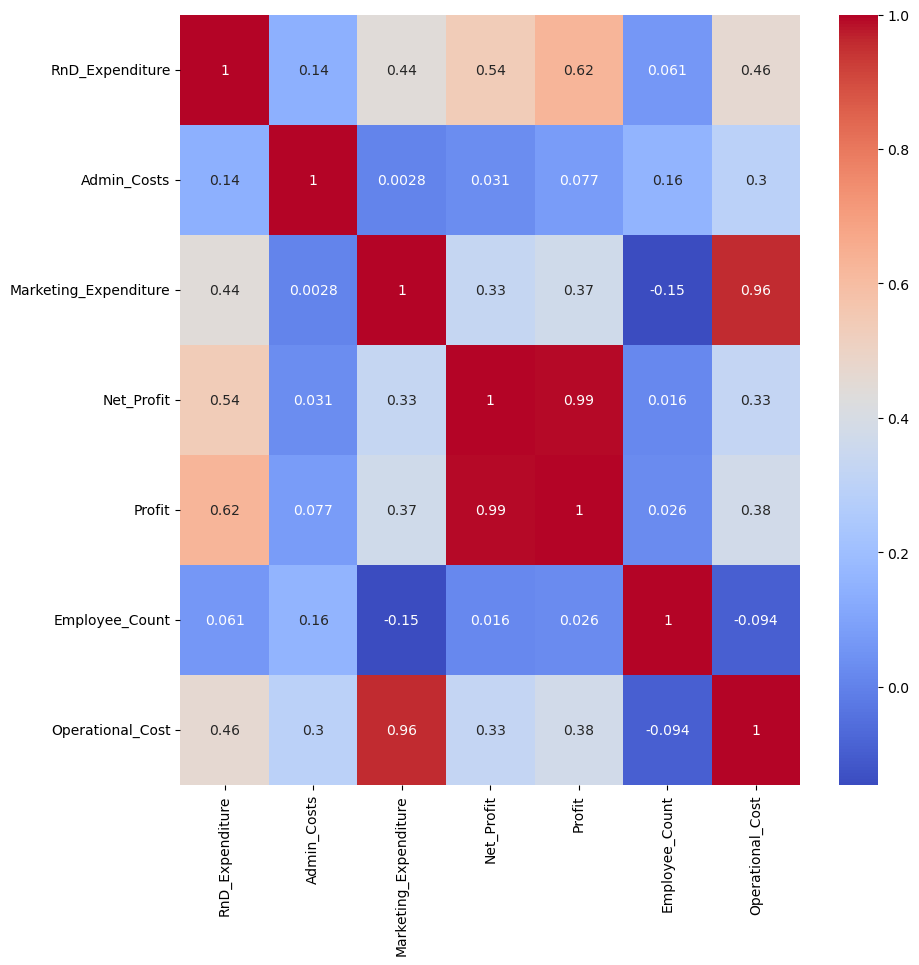

In [ ]:
numeric_columns = emprendimientos.select_dtypes(include=[np.number])  # Selecciona solo las columnas numéricas

plt.figure(figsize = (10, 10))

sns.heatmap(
    numeric_columns.corr(), 
    cmap = 'coolwarm', 
    annot = True, 
    annot_kws = {"size": 10})

In [ ]:
#intuicion??????? cada tanto de esto, sube tanto de lo otro

In [ ]:
emprendimientos.columns

Index(['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure', 'Location',
       'Net_Profit', 'Industry_Sector', 'Profit', 'Employee_Count',
       'Investment_Round', 'Operational_Cost'],
      dtype='object')

Me pregunto si explica mejor el net profit un modelo con las variables numericas, categoricas o ambas juntas, por eso analizo y comparo esos modelos entre si y me quedo con el que mayor R cuadrado tenga ya que es mas explicativo 

MODELO CON TODAS LAS VARIABLES NUMERICAS

In [ ]:
features = ['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure', 'Employee_Count','Operational_Cost']
formula = "Net_Profit~ " + ' + '.join(features)
formula

'Net_Profit~ RnD_Expenditure + Admin_Costs + Marketing_Expenditure + Employee_Count + Operational_Cost'

In [ ]:
modelnumericas = smf.ols(formula,data=emprendimientos)
modelnumericas=modelnumericas.fit()
modelnumericas.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     6.985
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           9.67e-05
Time:                        18:56:01   Log-Likelihood:                -842.48
No. Observations:                  70   AIC:                             1695.
Df Residuals:                      65   BIC:                             1706.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.535e+04   1.94e+04      3.369      0.001    2.66e+04    1.04e+05
RnD_Expenditure           0.5156      0.124      4.149      0.000       0.267       0.764
Admin_Costs              -0.0497      0.088     -0.562      0.576      -0.226       0.127
Marketing_Expenditure     0.0473      0.052      0.909      0.367      -0.057       0.151
Employee_Count            3.4692     37.252      0.093      0.926     -70.929      77.868
Operational_Cost         -0.0023      0.047     -0.050      0.960      -0.096       0.091
==============================================================================
Omnibus:                       29.441   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.449
Skew:                          -1.322   Prob(JB):                     1.85e-16
Kurtosis:                       7.225   Cond. No.                     1.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.91e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Como el P value tiene que ser menor a 0.05 solo una variable es estadisticamente significativa para explicar el modelo es RnD_expenditure 

MODELO CON TODAS LAS VARIABLES CATEGORICAS

In [ ]:
features = ['C(Location)', 'C(Industry_Sector)','C(Investment_Round)']
formula = "Net_Profit~ " + ' + '.join(features)
formula

'Net_Profit~ C(Location) + C(Industry_Sector) + C(Investment_Round)'

In [ ]:
modelcategoricas = smf.ols(formula,data=emprendimientos)
modelcategoricas=modelcategoricas.fit()
modelcategoricas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     1.205
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.307
Time:                        18:56:01   Log-Likelihood:                -848.49
No. Observations:                  70   AIC:                             1719.
Df Residuals:                      59   BIC:                             1744.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         7.984e+04   2.48e+04      3.222      0.002    3.03e+04    1.29e+05
C(Location)[T.Florida]            5942.5834   1.64e+04      0.362      0.719   -2.69e+04    3.88e+04
C(Location)[T.New York]           6784.2221   1.52e+04      0.445      0.658   -2.37e+04    3.73e+04
C(Industry_Sector)[T.Finance]     3.292e+04   2.07e+04      1.588      0.118   -8572.215    7.44e+04
C(Industry_Sector)[T.Healthcare] -6291.8788   1.89e+04     -0.332      0.741   -4.42e+04    3.16e+04
C(Industry_Sector)[T.Retail]      6532.8956   2.13e+04      0.306      0.761   -3.62e+04    4.92e+04
C(Industry_Sector)[T.Tech]        2.241e+04   1.89e+04      1.187      0.240   -1.54e+04    6.02e+04
C(Investment_Round)[T.Seed]       4045.9862   2.35e+04      0.172      0.864    -4.3e+04    5.11e+04
C(Investment_Round)[T.Series A]   3.234e+04    3.3e+04      0.979      0.332   -3.38e+04    9.85e+04
C(Investment_Round)[T.Series B]   3.529e+04   2.72e+04      1.296      0.200   -1.92e+04    8.98e+04
C(Investment_Round)[T.Series C]   2.021e+04   2.68e+04      0.753      0.454   -3.35e+04    7.39e+04
==============================================================================
Omnibus:                        3.067   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.216   Jarque-Bera (JB):                2.008
Skew:                          -0.203   Prob(JB):                        0.366
Kurtosis:                       2.276   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como el P value tiene que ser menor a 0.05 ninguna variable es estadisticamente significativa para explicar el modelo

MODELO CON TODAS LAS VARIABLES (NUMERICAS Y CATEGORICAS)

In [ ]:
features = ['RnD_Expenditure', 'Admin_Costs', 'Marketing_Expenditure', 'C(Location)', 'C(Industry_Sector)', 'Employee_Count','C(Investment_Round)','Operational_Cost']


# estandarizo lo que le mande en la variable y lo fiteo


In [ ]:
formula = "Net_Profit~ " + ' + '.join(features)
formula

'Net_Profit~ RnD_Expenditure + Admin_Costs + Marketing_Expenditure + C(Location) + C(Industry_Sector) + Employee_Count + C(Investment_Round) + Operational_Cost'

In [ ]:
modeltodas = smf.ols(formula,data=emprendimientos)
modeltodas=modeltodas.fit()
modeltodas.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Net_Profit   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     2.531
Date:                Wed, 08 Nov 2023   Prob (F-statistic):            0.00729
Time:                        18:56:01   Log-Likelihood:                -837.59
No. Observations:                  70   AIC:                             1705.
Df Residuals:                      55   BIC:                             1739.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         6.354e+04   2.76e+04      2.299      0.025    8157.387    1.19e+05
C(Location)[T.Florida]            2378.7027   1.47e+04      0.162      0.872   -2.71e+04    3.19e+04
C(Location)[T.New York]           3426.4389   1.43e+04      0.239      0.812   -2.53e+04    3.21e+04
C(Industry_Sector)[T.Finance]     1.821e+04   1.91e+04      0.955      0.344      -2e+04    5.64e+04
C(Industry_Sector)[T.Healthcare]  -1.52e+04   1.75e+04     -0.869      0.389   -5.02e+04    1.99e+04
C(Industry_Sector)[T.Retail]     -7601.8150   1.94e+04     -0.392      0.697   -4.65e+04    3.13e+04
C(Industry_Sector)[T.Tech]        1.303e+04   1.72e+04      0.756      0.453   -2.15e+04    4.76e+04
C(Investment_Round)[T.Seed]       2287.6541   2.15e+04      0.107      0.915   -4.07e+04    4.53e+04
C(Investment_Round)[T.Series A]   1.813e+04   3.07e+04      0.591      0.557   -4.33e+04    7.96e+04
C(Investment_Round)[T.Series B]   2.017e+04   2.57e+04      0.786      0.435   -3.13e+04    7.16e+04
C(Investment_Round)[T.Series C]   1.906e+04   2.47e+04      0.773      0.443   -3.04e+04    6.85e+04
RnD_Expenditure                      0.4313      0.132      3.274      0.002       0.167       0.695
Admin_Costs                         -0.1105      0.094     -1.172      0.246      -0.299       0.078
Marketing_Expenditure                0.0845      0.056      1.510      0.137      -0.028       0.197
Employee_Count                      11.3353     42.243      0.268      0.789     -73.322      95.993
Operational_Cost                    -0.0260      0.049     -0.527      0.600      -0.125       0.073
==============================================================================
Omnibus:                       14.446   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.691
Skew:                          -0.754   Prob(JB):                     1.18e-05
Kurtosis:                       5.346   Cond. No.                     2.20e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Solo es significativo para el modelo la variable de RnD_expenditure ya que tiene un p value menor a 0.05 y se vuelve estadisticamente significativa. De iual manera, este modelo (que contiene las variables numéricas y las categóricas, es el mejor comparado conlos anteriores ya que tiene mayor R cuadrado